In [73]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [74]:
import ssl
ssl._create_default_https_context=ssl._create_unverified_context

In [75]:
(X_train,y_train),(X_test,y_Test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [76]:
X_test.shape

(10000, 32, 32, 3)

In [77]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [78]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [79]:
y_Test=y_Test.reshape(-1,)

In [80]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [81]:
 def plot_sample(X,y,index):
        plt.figure(figsize=(15,2))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])

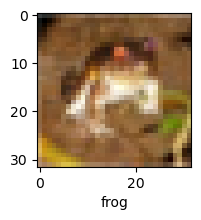

In [82]:
plot_sample(X_train,y_train,0)

In [83]:
#Normalization
X_train=X_train/255.0
X_test=X_test/255.0

In [84]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 128s 81ms/step - loss: 1.8124 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.6231 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.5413 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4812 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 124s 80ms/step - loss: 1.4314 - accuracy: 0.4958


In [85]:
ann.evaluate(X_test,y_Test)

313/313 [==============================] - 9s 24ms/step - loss: 1.5226 - accuracy: 0.4626


[1.5225751399993896, 0.4625999927520752]

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification Report: ",classification_report(y_Test,y_pred_classes))

313/313 [==============================] - 7s 23ms/step
classification Report:                precision    recall  f1-score   support

           0       0.65      0.41      0.50      1000
           1       0.79      0.37      0.50      1000
           2       0.36      0.33      0.35      1000
           3       0.30      0.52      0.38      1000
           4       0.35      0.51      0.42      1000
           5       0.61      0.16      0.26      1000
           6       0.54      0.48      0.51      1000
           7       0.40      0.69      0.51      1000
           8       0.61      0.62      0.62      1000
           9       0.56      0.53      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



In [87]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [88]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [89]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4542 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1062 - accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9745 - accuracy: 0.6598
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8890 - accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8221 - accuracy: 0.7141
Epoch 6/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7638 - accuracy: 0.7353
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7151 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6685 - accuracy: 0.7682
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.6291 - accuracy: 0.7812
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [90]:
cnn.evaluate(X_test,y_Test)


313/313 [==============================] - 4s 9ms/step - loss: 0.9556 - accuracy: 0.6874


[0.9555851817131042, 0.6873999834060669]

In [91]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[7.9210848e-05, 5.6505447e-05, 1.5188197e-03, 6.6426277e-01,
        5.0160935e-04, 9.0860687e-03, 2.3351128e-03, 5.1018460e-06,
        3.2213026e-01, 2.4525531e-05],
       [1.1662075e-02, 4.2233085e-03, 6.4311287e-05, 3.3290628e-06,
        1.5194973e-06, 5.3077812e-08, 3.8277848e-09, 9.0053810e-08,
        9.8382437e-01, 2.2094793e-04],
       [2.2635655e-03, 4.1271254e-02, 1.4498284e-04, 4.9399296e-03,
        5.6081865e-04, 5.9902004e-04, 3.2054395e-05, 2.1136241e-04,
        9.0064663e-01, 4.9330492e-02],
       [4.3097478e-01, 1.0212102e-03, 6.0017873e-02, 4.9701659e-04,
        5.0675916e-03, 2.0169813e-05, 3.4211153e-06, 8.3317245e-05,
        5.0209105e-01, 2.2360796e-04],
       [1.1939181e-07, 1.4342855e-06, 9.5363026e-03, 4.6516284e-01,
        3.3412328e-01, 2.4367269e-02, 1.6646814e-01, 9.1655584e-06,
        2.8351284e-04, 4.8005866e-05]], dtype=float32)

In [92]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 3]

In [93]:
y_Test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

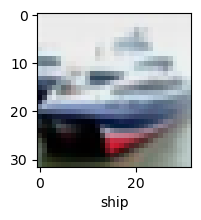

In [94]:
plot_sample(X_test,y_Test,1)

In [96]:
classes[y_classes[1]]

'ship'

In [98]:
print("Classification Report: ", classification_report(y_Test,y_classes))

Classification Report:                precision    recall  f1-score   support

           0       0.79      0.61      0.69      1000
           1       0.91      0.67      0.77      1000
           2       0.61      0.57      0.59      1000
           3       0.45      0.60      0.51      1000
           4       0.66      0.61      0.63      1000
           5       0.64      0.61      0.63      1000
           6       0.83      0.71      0.76      1000
           7       0.73      0.76      0.75      1000
           8       0.73      0.87      0.79      1000
           9       0.69      0.86      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

